# Lecture 2: Data Exploration of Chemistry Datasets

In this second lecture, we will first complete our basic tool set for doing simple mathematical calculations on a given data set in python and then embark into more chemistry related topics such as the access of chemistry databases, cheminformatics toolkits and ultimately the visulaization of data. 

## 2.1 Missing data: NaN, None, etc.

Today we start with a data set which contains a wide variety of organic molecules including their vapor pressures at 300 K, which you already know from Assignment 1. We find that dataset in the file `organic_vapor_pressures.csv` which we load using the known tools from pandas. 

In [1]:
import pandas as pd

vap_press = pd.read_csv('./organic_vapor_pressures.csv', sep=';')

vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000
1,2-Methylpentane,107-83-5,C6H14,0.305000
2,3-Methylpentane,96-14-0,C6H14,0.273500
3,n-Hexane,110-54-3,C6H14,0.219000
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000
...,...,...,...,...
89,Toluene,108-88-3,C7H8,0.041690
90,Cyclohexanol,108-93-0,C6H12O,0.000947
91,Cycloheptanol,502-41-0,C7H14O,0.000328
92,Cyclohexanone,108-94-1,C6H10O,0.006063


Let's recall how to disentengle the sum formula using regular expressions and then let's calculate molar masses (all done already in Assignment 1):

In [2]:
import re

def disentengle_sum_formulas(df):
    """
    disentengles a column 'sum formulas' with a pd.DataFrame and
    calculates the molecular mass of the substance (if only C, H,
    and O occur)

    Parameters
    ----------
    df : pd.DataFrame
        the data with a column containing sum formula strings

    Returns
    -------
    pd.DataFrame
        the data with additional columns for the elemental abundances
        and the molecular mass

    Raises
    ------
    KeyError
        if 'sum formula' is not in the columns
    """
    pattern = r"([A-Z][a-z]*)([0-9]*)"

    for idx in df.index:
        parsed = re.findall(pattern, df.loc[idx, 'Sum Formula'])
        for element in parsed:
            if element[0] not in df.columns:
                df[element[0]] = 0
            if element[1] == '':
                df.loc[idx, element[0]] = 1
            else:
                df.loc[idx, element[0]] = int(element[1])

    df.loc[:, 'M [g mol-1]'] = (
        df.loc[:, 'C']*12.011 + df.loc[:, 'H']*1.008 + df.loc[:, 'O']*15.999
        )

    return df

vap_press = disentengle_sum_formulas(vap_press)

vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1]
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000,6,14,0,86.178
1,2-Methylpentane,107-83-5,C6H14,0.305000,6,14,0,86.178
2,3-Methylpentane,96-14-0,C6H14,0.273500,6,14,0,86.178
3,n-Hexane,110-54-3,C6H14,0.219000,6,14,0,86.178
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000,6,14,0,86.178
...,...,...,...,...,...,...,...,...
89,Toluene,108-88-3,C7H8,0.041690,7,8,0,92.141
90,Cyclohexanol,108-93-0,C6H12O,0.000947,6,12,1,100.161
91,Cycloheptanol,502-41-0,C7H14O,0.000328,7,14,1,114.188
92,Cyclohexanone,108-94-1,C6H10O,0.006063,6,10,1,98.145


Here, I introduced the so-called [docstrings](https://peps.python.org/pep-0257/). It gives functions a documentation string after the function definition explaining what the function does, which arguments it takes, what types these arguments have, etc. Those docstrings are the basis for all documentation of published code which you can always find when inspecting a certain (well-coded) python package, as they can be [read-out automatically](https://about.readthedocs.com/) when programmers [convert their code to deployable packages](https://pythonpackaging.info/). It's very helpful documenting larger code that way, as you will always find very quickly what the purpose of a certain function is. 

Let's now recall how we can slice the data set such that we can identify certain groups of compounds, i.e. Alkanes, Aldehydes/Ketones, Alcohols and Acids. 

The rule for alkanes is C$_n$H$_{2n+2}$ and the do not contain any oxygen. So, let's try to filter out the alkanes and annotate them in a new column called 'group'.

In [3]:
is_alkane = ((vap_press['H'] == 2*vap_press['C']+2) & (vap_press['O'] == 0))
alkanes = vap_press.loc[is_alkane, :]

alkanes

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1]
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000,6,14,0,86.178
1,2-Methylpentane,107-83-5,C6H14,0.305000,6,14,0,86.178
2,3-Methylpentane,96-14-0,C6H14,0.273500,6,14,0,86.178
3,n-Hexane,110-54-3,C6H14,0.219000,6,14,0,86.178
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000,6,14,0,86.178
5,n-Pentane,109-66-0,C5H12,0.731700,5,12,0,72.151
6,2-Methylbutane,78-78-4,C5H12,0.979300,5,12,0,72.151
7,Neopentane,463-82-1,C5H12,1.830000,5,12,0,72.151
8,n-Butane,106-97-8,C4H10,2.576000,4,10,0,58.124
9,Isobutane,75-28-5,C4H10,3.703000,4,10,0,58.124


In [4]:
vap_press.loc[is_alkane, 'group'] = 'alkane'

vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1],group
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000,6,14,0,86.178,alkane
1,2-Methylpentane,107-83-5,C6H14,0.305000,6,14,0,86.178,alkane
2,3-Methylpentane,96-14-0,C6H14,0.273500,6,14,0,86.178,alkane
3,n-Hexane,110-54-3,C6H14,0.219000,6,14,0,86.178,alkane
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000,6,14,0,86.178,alkane
...,...,...,...,...,...,...,...,...,...
89,Toluene,108-88-3,C7H8,0.041690,7,8,0,92.141,NaN
90,Cyclohexanol,108-93-0,C6H12O,0.000947,6,12,1,100.161,NaN
91,Cycloheptanol,502-41-0,C7H14O,0.000328,7,14,1,114.188,NaN
92,Cyclohexanone,108-94-1,C6H10O,0.006063,6,10,1,98.145,NaN


Single Ketones and Aldehydes of organics without double bonds follow C$_n$H$_{2n}$O, alkohols C$_n$H$_{2n+2}$O, acids C$_n$H$_{2n}$O$_2$.

In [5]:
is_carbonyl = ((vap_press['H'] == 2*vap_press['C']) & (vap_press['O'] == 1))
vap_press.loc[is_carbonyl, 'group'] = 'carbonyl'

is_alcohol = ((vap_press['H'] == 2*vap_press['C']+2) & (vap_press['O'] == 1))
vap_press.loc[is_alcohol, 'group'] = 'alcohol'

is_acid = ((vap_press['H'] == 2*vap_press['C']) & (vap_press['O'] == 2))
vap_press.loc[is_acid, 'group'] = 'acid'

vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1],group
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000,6,14,0,86.178,alkane
1,2-Methylpentane,107-83-5,C6H14,0.305000,6,14,0,86.178,alkane
2,3-Methylpentane,96-14-0,C6H14,0.273500,6,14,0,86.178,alkane
3,n-Hexane,110-54-3,C6H14,0.219000,6,14,0,86.178,alkane
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000,6,14,0,86.178,alkane
...,...,...,...,...,...,...,...,...,...
89,Toluene,108-88-3,C7H8,0.041690,7,8,0,92.141,NaN
90,Cyclohexanol,108-93-0,C6H12O,0.000947,6,12,1,100.161,carbonyl
91,Cycloheptanol,502-41-0,C7H14O,0.000328,7,14,1,114.188,carbonyl
92,Cyclohexanone,108-94-1,C6H10O,0.006063,6,10,1,98.145,NaN


We see now, that after creating the new column, all entries which were not assigned get a **NaN**, when the DataFrame is displayed. 

What is this? Let's explore:

In [6]:
missing_value = vap_press.loc[93, 'group']

print(type(missing_value))
missing_value

<class 'float'>


nan

So it's of type `float` but it is **N**ot **a** **N**umber (NaN).

Pandas apparently uses this when data is missing at one spot in the DataFrame, i.e. when no assignment has been taking place. This is a very helpful way to deal with missing information, i.e. create a value which is declaring that there is nothing. 

We can also assign **NaN** using numpy. Let's add another molecule to the dataset:

In [7]:
import numpy as np

alkenes = {'Name': ['1-Hexene'],
           'CAS': ['592-41-6'],
           'Sum Formula': ['C6H12'],
           'P [bar] at 300 K': [np.nan],
           'C': [6],
           'H': [12],
           'O': [0],
           'M [g mol-1]': [84.1595],
           'group': ['alkene']}

vap_press = pd.concat([vap_press, pd.DataFrame(alkenes)], ignore_index=True)

vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1],group
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000,6,14,0,86.1780,alkane
1,2-Methylpentane,107-83-5,C6H14,0.305000,6,14,0,86.1780,alkane
2,3-Methylpentane,96-14-0,C6H14,0.273500,6,14,0,86.1780,alkane
3,n-Hexane,110-54-3,C6H14,0.219000,6,14,0,86.1780,alkane
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000,6,14,0,86.1780,alkane
...,...,...,...,...,...,...,...,...,...
90,Cyclohexanol,108-93-0,C6H12O,0.000947,6,12,1,100.1610,carbonyl
91,Cycloheptanol,502-41-0,C7H14O,0.000328,7,14,1,114.1880,carbonyl
92,Cyclohexanone,108-94-1,C6H10O,0.006063,6,10,1,98.1450,NaN
93,Cyclobutanone,1191-95-3,C4H6O,0.060450,4,6,1,70.0910,NaN


For now, this is good to know and should be our first premise in how to handle missing data. We do not leave "space" (e.g. an empty string) and we do not use replacement numbers (such as 0) when data is missing. We try to mark it missing from the beginning on. 

This is also because `np.nan` works differently when it comes to certain operations, e.g. comparisons:

In [8]:
# np.nan == 0

**And more importantly (never forget!!!):**

In [9]:
# np.nan == np.nan
# False! that is good to know, otherwise some operations might break 
# or leave us with false ideas about the data

# TODO: But remember, that means you cannot look for nan with element == np.nan 
# since np.nan != np.nan


&rarr; we need to rely on numpy or pandas methods to identify NaNs:

- [`pd.isna()`](https://pandas.pydata.org/pandas-docs/version/1.4/reference/api/pandas.isna.html) to identify NaNs in a `pd.DataFrame` or `pd.Series`
- [`np.isnan()`](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html) to identify NaNs in numpy data types.

There are some key differences when it comes to mixed data types and other than numeric data:

| Feature         | `np.isnan()` (NumPy) | `pd.isna()` (Pandas) |
|---------------|--------------------|--------------------|
| Works with arrays | ✅ Yes | ✅ Yes (DataFrame & Series) |
| Works with scalars | ✅ Yes | ✅ Yes |
| Works with strings | ❌ No (Raises `TypeError`) | ✅ Yes |
| Detects `None` | ❌ No | ✅ Yes |
| Best for | Pure numeric data | Mixed data (real-world datasets) |

In [10]:
vap_press['P [bar] at 300 K'].isna()

0     False
1     False
2     False
3     False
4     False
      ...  
90    False
91    False
92    False
93    False
94     True
Name: P [bar] at 300 K, Length: 95, dtype: bool

In [11]:
np.isnan(vap_press['P [bar] at 300 K'])

0     False
1     False
2     False
3     False
4     False
      ...  
90    False
91    False
92    False
93    False
94     True
Name: P [bar] at 300 K, Length: 95, dtype: bool

However, as said above, the pandas function `pd.isna()` can also deal with other types of missing values.

- `None` is pythons built-in data type for missing values. It is actually slightly more versatile than np.nan however when used with mathematical operations, it returns Errors.
- `pd.NA` is pandas built-in missing value format. It also works on object data columns.
- `pd.NaT` is pandas built-in missing value format for time-based data types. This will become important later in the lecture.

The important thing to remember is that pandas typically takes care of missing data types quite well, if we stick to the pandas functions such as pd.isna() when it comes to missing values. 

In [12]:
hydroperoxy_pinonic_acid = {'Name': ['Hydroperoxy Pinonic Acid'],
                            'CAS': [None],
                            'Sum Formula': ['C6H12'],
                            'P [bar] at 300 K': [np.nan],
                            'C': [10],
                            'H': [16],
                            'O': [4],
                            'M [g mol-1]': [84.1595],
                            'group': [pd.NA]}

vap_press = pd.concat([vap_press, pd.DataFrame(hydroperoxy_pinonic_acid)], ignore_index=True)

vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1],group
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000,6,14,0,86.1780,alkane
1,2-Methylpentane,107-83-5,C6H14,0.305000,6,14,0,86.1780,alkane
2,3-Methylpentane,96-14-0,C6H14,0.273500,6,14,0,86.1780,alkane
3,n-Hexane,110-54-3,C6H14,0.219000,6,14,0,86.1780,alkane
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000,6,14,0,86.1780,alkane
...,...,...,...,...,...,...,...,...,...
91,Cycloheptanol,502-41-0,C7H14O,0.000328,7,14,1,114.1880,carbonyl
92,Cyclohexanone,108-94-1,C6H10O,0.006063,6,10,1,98.1450,NaN
93,Cyclobutanone,1191-95-3,C4H6O,0.060450,4,6,1,70.0910,NaN
94,1-Hexene,592-41-6,C6H12,NaN,6,12,0,84.1595,alkene


In [13]:
vap_press['CAS'].isna()
# pd.isna() also finds the py-built-in "None"

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95     True
Name: CAS, Length: 96, dtype: bool

Now we can make use of another pandas function [`pd.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) e.g., to get rid of entries which do not provide a CAS number.

In [14]:
# Dropping all rows with CAS = None, NaN, etc.
vap_press.dropna(subset=['CAS'], inplace=True)

vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1],group
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000,6,14,0,86.1780,alkane
1,2-Methylpentane,107-83-5,C6H14,0.305000,6,14,0,86.1780,alkane
2,3-Methylpentane,96-14-0,C6H14,0.273500,6,14,0,86.1780,alkane
3,n-Hexane,110-54-3,C6H14,0.219000,6,14,0,86.1780,alkane
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000,6,14,0,86.1780,alkane
...,...,...,...,...,...,...,...,...,...
90,Cyclohexanol,108-93-0,C6H12O,0.000947,6,12,1,100.1610,carbonyl
91,Cycloheptanol,502-41-0,C7H14O,0.000328,7,14,1,114.1880,carbonyl
92,Cyclohexanone,108-94-1,C6H10O,0.006063,6,10,1,98.1450,NaN
93,Cyclobutanone,1191-95-3,C4H6O,0.060450,4,6,1,70.0910,NaN


Note that like many pandas functions [`pd.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) has an `inplace` keyowrd argument, which executes the method on the pandas object directly without the need to use a return value. 

It is also good to know, that the pandas read-in functions have options to specify that any other entries in a dataset can be interpreted as NaN. 

For example `pd.read_csv()` has the keyword `na_values` where we can e.g. specify to interprete the string `alkene` also as a NaN:

In [15]:
pd.read_csv('./organic_vapor_pressures.csv', sep=';', na_values='alkenes')

,Name,CAS,Sum Formula,P [bar] at 300 K
0,"2,3-Dimethylbutane",79-29-8,C6H14,0.388000
1,2-Methylpentane,107-83-5,C6H14,0.305000
2,3-Methylpentane,96-14-0,C6H14,0.273500
3,n-Hexane,110-54-3,C6H14,0.219000
4,"2,2-Dimethylbutane",75-83-2,C6H14,0.457000
...,...,...,...,...
89,Toluene,108-88-3,C7H8,0.041690
90,Cyclohexanol,108-93-0,C6H12O,0.000947
91,Cycloheptanol,502-41-0,C7H14O,0.000328
92,Cyclohexanone,108-94-1,C6H10O,0.006063


## 2.2 Basic statistic descriptors in python

### 2.2.1 Mean, median, standard deviation, quantiles

Now let's see if we can extract some meaningful values from our list of vapor pressures, i.e. classical statistical descriptors such as mean, median, standard deviation and quantiles. Again, there are numpy and pandas functions for this available.

There are two major differences: 
- numpy uses them as functions and pandas as methods of the DataFrame: [`np.mean(df)`](https://numpy.org/doc/2.2/reference/generated/numpy.mean.html) and [`df.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html), i.e. for numpy the array-like structure you want to compute the mean from needs to be an argument and the function is called from the numpy namespace, while for pandas it is a method of the DataFrame class and can be called from any pd.DataFrame object (or pd.Series).
- numpy returns `NaN` as soon as one value is `NaN` and pandas ignores them by default. numpy also provides e.g. `np.nanmean()` to also include `NaN` and the pandas methods can be called with the keyword `skipna=False` which will include them and return `NaN` as soon as one is present.

In [16]:
test_array = np.array([1, 1, 2, np.nan])
test_series = pd.Series([1, 1, 2, np.nan])

print(f"\t \t \t np.mean = \t {np.mean(test_array)}")
print(f"\t \t \t np.nanmean = \t {np.nanmean(test_array)}")

print(f"\t \t test.series.mean = \t {test_series.mean()}")
print(f"\t test.series.mean(skipna = Flase) = {test_series.mean(skipna=False)}")

	 	 	 np.mean = 	 nan
	 	 	 np.nanmean = 	 1.3333333333333333
	 	 test.series.mean = 	 1.3333333333333333
	 test.series.mean(skipna = Flase) = nan


However:

In [17]:
print(np.mean(test_series))

1.3333333333333333


Again, we see slightly inconsistent behavior here of numpy.

**Conclusion: If we anyways work with pandas, stick to the pandas methods!**

Pandas also provides other descriptors, such as [`pd.std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html), [`pd.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html), and [`pd.quantile()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html), which all work similar as [`pd.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html).

That way we can find out that the median vapor pressure of all alkanes in our database is much higher than the one of all acids and even the 10% quantile of the alkane vapor pressures are higher than the median of the acids. 

In [18]:
# mean vap-pres of alcanes
# access the df.loc[vap_press['group']==alkanes, 
vap_press.loc[vap_press['group']=='alkane', 'P [bar] at 300 K'].median()

0.087

In [19]:
vap_press.loc[vap_press['group']=='alkane', 'P [bar] at 300 K'].quantile(q=0.1)

0.024050000000000002

In [20]:
vp_alkanes_mean = vap_press.loc[vap_press['group']=='alkane', 'P [bar] at 300 K'].quantile(q=0.5)
vp_acids_mean =   vap_press.loc[vap_press['group']=='acid', 'P [bar] at 300 K'].quantile(q=0.5)

print(f"vp_alkanes_mean = {vp_alkanes_mean}")
print(f"vp_acids_mean = {vp_acids_mean}")

vp_alkanes_mean = 0.087
vp_acids_mean = 0.002413


Note that `df.quantile(q=0.5)` and `df.median` are equivalent in their output. 

Let's also quickly recall how we can group a `pd.DataFrame` using `groupby()` instead, where we could get all values for all groups in the dataset at once:

In [21]:
grouped = vap_press.groupby('group')
print(grouped)

for key, group_df in grouped:
    group_median = group_df['P [bar] at 300 K'].median()
    print(key, group_median)

acid 0.002413
alcohol 0.009544500000000001
alkane 0.087
alkene nan
carbonyl 0.02036


### 2.2.2 More complex statistics: covariance, correlation coefficients

Let's recall some more in-depth statistics. 

Understanding the relationship between two variables is a central task in statistics. Two key concepts for this purpose are **covariance** and **Pearson's $r$**. Covariance provides a basic measure of how two variables change together, while Pearson’s $r$ standardizes this measure to give a dimensionless coefficient that is easier to interpret.

We want to find out what molecular properties define vapor pressure. And let's start with the question how the abundances of C, H and O *correlate* or *anti-correlate* with vapor pressure, i.e. is there a dependence which means more C also mean higher or lower vapor pressure, respectively?

#### Covariance

**Covariance** measures the joint variability of two variables. In other words, it tells us whether increases in one variable tend to be associated with increases (or decreases) in another.

The formula for the sample covariance between two variables $X$ and $Y$ is:

$$
\text{Cov}(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})
$$

Where:
- $x_i$ and $y_i$ are the individual data points.
- $\bar{x}$ and $\bar{y}$ are the mean values of $X$ and $Y$, respectively.
- $n$ is the number of paired observations.

The covariance can be interpreted as follows:

- **Positive Covariance:** When one variable increases, the other tends to increase.
- **Negative Covariance:** When one variable increases, the other tends to decrease.
- **Zero Covariance:** Indicates no linear relationship between the variables.


#### Pearson's $r$

While covariance gives an idea of the direction of the relationship, its magnitude depends on the units of the variables, which can make interpretation difficult. **Pearson’s r** overcomes this limitation by standardizing the covariance and can quantify the **linear** relationship between two continuous variables. Its value ranges from –1 to +1, where:

- **+1** indicates a perfect positive linear relationship.
- **–1** indicates a perfect negative linear relationship.
- **0** indicates no linear relationship.

The formula for Pearson’s $r$ is given by:

$$
r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

Where:

- $x_i$ and $y_i$ are the individual sample points.
- $\bar{x}$ and $\bar{y}$ represent the mean values of the $x $ and $y$ variables, respectively.
- $n$ is the number of paired observations.


#### Correlation analysis in pandas

The covariance in pandas is calculated using [`pd.cov()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html). However, that method of the DataFrame class returns the entire [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix), i.e. the covariance between all different columns of the DataFrame, which causes errors as soon as non-numeric columns are present as the case in our `vap_press` DataFrame, but this can be avoided by the keyword `numeric_only=True`. 

In [22]:
vap_press.cov(numeric_only=True)

,P [bar] at 300 K,C,H,O,M [g mol-1]
P [bar] at 300 K,1.295920,-0.612080,-1.029872,-0.153461,-10.845023
C,-0.612080,3.316237,7.258903,-0.556327,38.247629
H,-1.029872,7.258903,17.972676,-1.406943,82.793490
O,-0.153461,-0.556327,-1.406943,0.374692,-2.105526
M [g mol-1],-10.845023,38.247629,82.793490,-2.105526,509.162148


Usage of numpy is also straight-forward (again working as a function, not a methd):

In [23]:
np.cov(vap_press['C'], vap_press['P [bar] at 300 K'])

array([[3.3162374,       nan],
       [      nan,       nan]])

However, two things are apparent:  
- Numpy also here returns the covariance matrix (with the diagonal entries being the variances of the individual variables, i.e. columns)
- it seems again that numpy does not handle the NaN properly and just returns NaN whenever a NaN is present in the column values

In [24]:
vap_press_notna = vap_press.dropna(subset=['P [bar] at 300 K'])

c_to_p = np.cov(vap_press_notna['C'], vap_press_notna['P [bar] at 300 K'])
o_to_p = np.cov(vap_press_notna['O'], vap_press_notna['P [bar] at 300 K'])

c_to_p

array([[ 3.35175017, -0.61207979],
       [-0.61207979,  1.29591985]])

We can see now, that vapor pressure correlates negatively with the number of C and O in our molecule. However, the magnitude of the covariance is no quantitative statement of that correlation. For that, we need to switch to the Pearson's $r$, where pandas provides the function [`pd.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) and numpy provides the function [`np.corrcoef()`](https://numpy.org/devdocs/reference/generated/numpy.corrcoef.html), again with the known differences in handling missing data. 

In [25]:
vap_press.corr(numeric_only=True)

,P [bar] at 300 K,C,H,O,M [g mol-1]
P [bar] at 300 K,1.000000,-0.293686,-0.212357,-0.220448,-0.420725
C,-0.293686,1.000000,0.940247,-0.499080,0.930794
H,-0.212357,0.940247,1.000000,-0.542167,0.865489
O,-0.220448,-0.499080,-0.542167,1.000000,-0.152439
M [g mol-1],-0.420725,0.930794,0.865489,-0.152439,1.000000


Combined with a cut on the type of molecule we find a quite strong negative correlation between number of C atoms and the vapor pressure:

In [26]:
vap_press.loc[vap_press['group']=='alkane', :].corr(numeric_only=True)

,P [bar] at 300 K,C,H,O,M [g mol-1]
P [bar] at 300 K,1.000000,-0.687603,-0.687603,NaN,-0.687603
C,-0.687603,1.000000,1.000000,NaN,1.000000
H,-0.687603,1.000000,1.000000,NaN,1.000000
O,NaN,NaN,NaN,NaN,NaN
M [g mol-1],-0.687603,1.000000,1.000000,NaN,1.000000


For identifying the highest correlation or anti-correlation (i.e. absolute Pearson's r), we need to get rid of the diagonal entries.

We introduce the [`pd.DataFrame.mask()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) method which replaces all values where a certain condition is true with a value other (if not specified with NaN). Using the numpy function [`np.eye`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) we create an dientity matrix, which we can use as the mask to remove the diagonbal entries. 

In [27]:
corr_matrix = vap_press.loc[vap_press['group']=='alkane', :].corr(numeric_only=True)

identity = np.eye(corr_matrix.shape[0], dtype=bool)

off_diag_values = corr_matrix.mask(identity)

off_diag_values

,P [bar] at 300 K,C,H,O,M [g mol-1]
P [bar] at 300 K,NaN,-0.687603,-0.687603,NaN,-0.687603
C,-0.687603,NaN,1.000000,NaN,1.000000
H,-0.687603,1.000000,NaN,NaN,1.000000
O,NaN,NaN,NaN,NaN,NaN
M [g mol-1],-0.687603,1.000000,1.000000,NaN,NaN


We get the variables of maximum (anti-)correlation:

In [28]:
max_idx_1 = off_diag_values.abs()
max_idx_2 = off_diag_values.abs().stack()
max_idx_3a = off_diag_values.abs().stack().max() # gives the max value
max_idx_3b = off_diag_values.abs().stack().idxmax() # gives the index of the max value

print(
    f".abs(): \n {max_idx_1} \n"
    f".abs().stack(): \n {max_idx_2} \n"
    f".abs().stack().max(): \n {max_idx_3a} \n"
    f".abs().stack().idxmax(): \n {max_idx_3b} \n")

.abs(): 
                   P [bar] at 300 K         C         H   O  M [g mol-1]
P [bar] at 300 K               NaN  0.687603  0.687603 NaN     0.687603
C                         0.687603       NaN  1.000000 NaN     1.000000
H                         0.687603  1.000000       NaN NaN     1.000000
O                              NaN       NaN       NaN NaN          NaN
M [g mol-1]               0.687603  1.000000  1.000000 NaN          NaN 
.abs().stack(): 
 P [bar] at 300 K  C                   0.687603
                  H                   0.687603
                  M [g mol-1]         0.687603
C                 P [bar] at 300 K    0.687603
                  H                   1.000000
                  M [g mol-1]         1.000000
H                 P [bar] at 300 K    0.687603
                  C                   1.000000
                  M [g mol-1]         1.000000
M [g mol-1]       P [bar] at 300 K    0.687603
                  C                   1.000000
                  H   

#### Estimating Non-Linear Dependencies

Pearson’s r and covariance focus on linear relationships. However, many real-world relationships are non-linear. To capture these non-linear dependencies, several alternative methods can be employed:

- **Spearman's Rank Correlation Coefficient:**  
  This non-parametric measure assesses the strength and direction of the monotonic relationship between two variables. Instead of using the actual data values, it uses the ranks, making it less sensitive to outliers and capable of detecting non-linear monotonic relationships. 

- **Kendall's Tau:**  
  Another non-parametric measure that evaluates the ordinal association between two variables. It is useful when the data contain many tied ranks and when assessing the strength of a monotonic relationship.

The convenient thing is that the output of Spearman's Rank Correlation Coefficient and Kendall's Tau work similar to the Pearson's $r$: +1 means perfect positive correlation (as one variable increases, the other also increases in rank, 0 means no correlation (no relationship between the ranks), and -1 means perfect negative correlation (as one variable increases, the other decreases in rank).

Luckily `pd.corr()` directly provides these approaches (no need for a different method to learn) by using key words:


In [29]:
vap_press.loc[vap_press['group']=='alkane', :].corr(method='spearman', numeric_only=True)

,P [bar] at 300 K,C,H,O,M [g mol-1]
P [bar] at 300 K,1.00000,-0.97557,-0.97557,NaN,-0.97557
C,-0.97557,1.00000,1.00000,NaN,1.00000
H,-0.97557,1.00000,1.00000,NaN,1.00000
O,NaN,NaN,NaN,NaN,NaN
M [g mol-1],-0.97557,1.00000,1.00000,NaN,1.00000


In [30]:
vap_press.loc[vap_press['group']=='alkane', :].corr(method='kendall', numeric_only=True)

,P [bar] at 300 K,C,H,O,M [g mol-1]
P [bar] at 300 K,1.00000,-0.90764,-0.90764,NaN,-0.90764
C,-0.90764,1.00000,1.00000,NaN,1.00000
H,-0.90764,1.00000,1.00000,NaN,1.00000
O,NaN,NaN,NaN,1.0,NaN
M [g mol-1],-0.90764,1.00000,1.00000,NaN,1.00000


However, both methods only identify monotonic dependencies of two variables. If you are interested if two variables have any kind of dependecy to each other (also not-monotonic) the use: 

- **Mutual Information (MI)**:  
    This is a *measure of dependency* between two variables. It quantifies how much knowing one variable *reduces uncertainty* about the other. Unlike Pearson or Spearman correlations, MI captures *both linear and non-linear relationships*. MI Scores: $I(X; Y) = 0$ means no relationship (independent variables) and higher MI values mean a  stronger dependency. Note that MI is **always ≥ 0** but has **no upper bound**.

We can use the extremely powerful library [scikit-learn](https://scikit-learn.org/stable/) (`sklearn`) for calculating the mutual information in pyton:

In [31]:
from sklearn.feature_selection import mutual_info_regression
df = vap_press.dropna(subset=['P [bar] at 300 K'])
mi_score = mutual_info_regression(df[['C']], df['P [bar] at 300 K'])

mi_score[0]

0.3467233399213172

We will get back to [scikit-learn](https://scikit-learn.org/stable/) in later lectures. 

For now we have seen that `pandas` is not only an efficient tool for read-in and structuring of data but also provides the basic statistic descriptors and handles missing values on-the-flight. Pandas will be the basis for almost all our future work here and it is therefore highly recommended to get familiar with pandas as much as possible.  

## 2.3 Data Visualization: matplotlib

Interestingly,  the *human eye* which is extremely good in detecting dependencies of different variables. So before choosing among all the above mentionned methods, it might be faster to visualize the data first, and look at the dependencies. 

In that case we enter one of the most important libraries in python to master: **matplotlib**. 

In [32]:
import matplotlib

Matplotlib is a comprehensive visualization library in Python. It is structured as a *hierarchical* library, meaning it consists of multiple layers of abstraction that allow users to create plots at different levels of complexity.

Matplotlib has a *multi-layered architecture*, which can be divided into the following key components:

- **The Backend Layer**, which handles rendering (i.e., drawing) the plots and different backends support different output formats, including *Interactive backends* (for GUI applications: TkAgg, Qt5Agg, GTK3Agg) and *Non-interactive backends* (for saving images/files: Agg (PNG), PDF, SVG).

- **The Artist Layer**, which consists of everything you see in a plot (like lines, text, and axes) with two main types of Artists: *Primitives*, like basic elements such as lines, text, patches, images, and *Containers*, which are higher-level groups like figures and axes that hold multiple elements.

- **The Scripting Layer (`matplotlib.pyplot`)**, which is the highest-level API used by most users and provides functions similar to MATLAB’s plotting commands, managing figures and axes automatically.

We now will focus on making simple plots using the easy-to-use **Scripting Layer** (importing `matplotlib.pyplot`), where the most basic function is [`plt.plot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.plot.html):

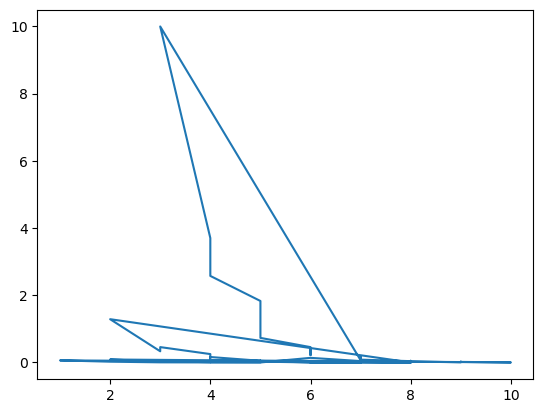

In [33]:
import matplotlib.pyplot as plt

plt.plot(vap_press['C'], vap_press['P [bar] at 300 K'])

We see it makes a plot, but it isn't very beautiful. 

`plt.plot()` will always make a line-plot without any axes labels, etc. 

We can force it to make a scatter plot, with the third argument specifying the type of symbol to be used:

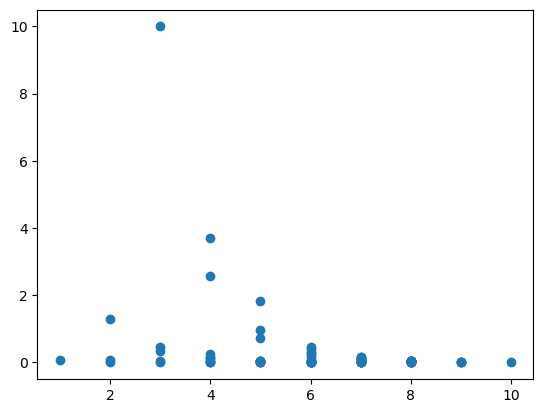

In [34]:
plt.plot(vap_press['C'], vap_press['P [bar] at 300 K'], 'o')

The vapor pressure axis (y-axis, second argument) is probably more understandable in log-scale.

For that we call the axis ([`plt.gca()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html) ("get current axis" -> "gca") and specify its scale:

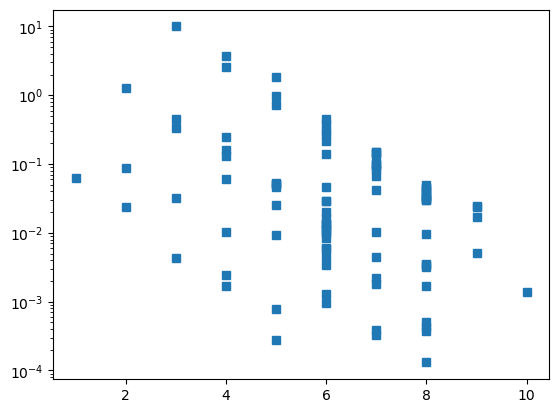

In [35]:
plt.plot(vap_press['C'], vap_press['P [bar] at 300 K'], 's')
plt.gca().set_yscale('log')

This brings us already to the deeper understanding of the lower-level *object-orientated* **Artist Layer**. All parts of the plot created by matplotlib are *containers* or *objects* of a certain type, which contain several *methods* manipulating these objects. While `matplotlib.pyplot` lets you modify these artists using its internal methods, we can also extract the underlying obejects, showing us how python works with the plots it is creating through matplotib:

Text(0.5, 0, 'number of carbon atoms')

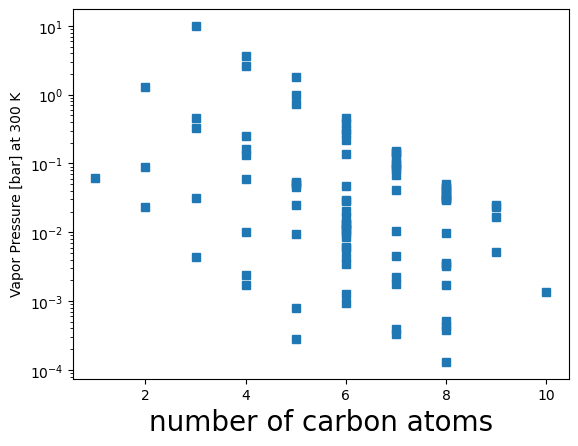

In [36]:
plt.plot(vap_press['C'], vap_press['P [bar] at 300 K'], 's')
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel('Vapor Pressure [bar] at 300 K')
ax.set_xlabel('number of carbon atoms', fontsize=20)

In [37]:
type(ax)

matplotlib.axes._axes.Axes

Looking at the data, we see that there is a negative correlation between the logarithm of the vapor pressure and the number of carbon atoms (as suggested by our statistical descriptors), but it is quite scattered. 

Let's visualize a third axis by using a color-code, for that we need to use another function from matplotlib for plotting: [`plt.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

We also need to introduce other matplotlib packages here, namely [`matplotlib.colors`](https://matplotlib.org/2.0.1/api/colors_api.html) which can convert colors represented as numeric values between different representations of colors (and thereby also find ways to normalize numerical vlaues to color input) and [`matplotlib.cm`](https://matplotlib.org/stable/api/cm_api.html) which simply provides different colormaps. 

Text(0.5, 0, 'number of carbon atoms')

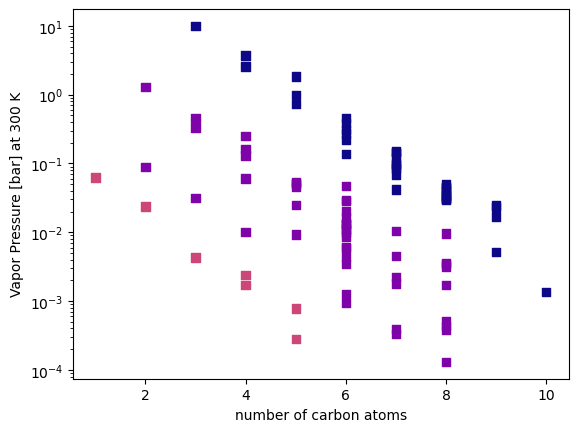

In [38]:
import matplotlib.colors
import matplotlib.cm

cnorm = matplotlib.colors.Normalize(vmin=0, vmax=4)

plt.scatter(vap_press['C'], vap_press['P [bar] at 300 K'], 
            marker='s', c=matplotlib.cm.plasma(cnorm(vap_press['O'])))
# c=matplotlib.cm.plasma(cnorm(vap_pres['o'])) to get the more info into the plot
plt.gca().set_yscale('log')
plt.gca().set_ylabel('Vapor Pressure [bar] at 300 K')
plt.gca().set_xlabel('number of carbon atoms')

Altogether we now see what are the two main determinants for vapor pressure: Carbon and oxygen number!

We can even add a colorbar (going towards an artist layer representation of the script):

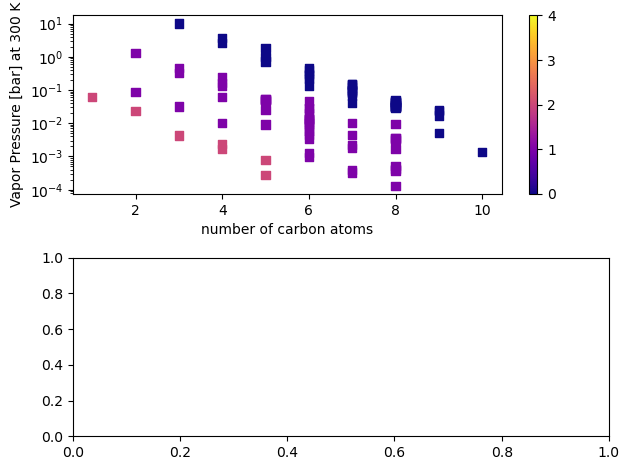

In [39]:
cnorm = matplotlib.colors.Normalize(vmin=0, vmax=4)

f, (ax, ax2) = plt.subplots(2, 1) # figure is a variable f, and ax is the axis in ax
# now we acces the variable ax in f and plot a scatter onto the axis
# this is the artist layer, we can have multiple axis in f e.g. ax1, ax2 etc.
sc = ax.scatter(vap_press['C'], vap_press['P [bar] at 300 K'], marker='s', c=vap_press['O'], cmap=matplotlib.cm.plasma, norm=cnorm)
ax.set_yscale('log')
ax.set_ylabel('Vapor Pressure [bar] at 300 K')
ax.set_xlabel('number of carbon atoms')
f.colorbar(sc, ax=ax)
f.tight_layout()

We can also insert several *plots* into one figure as each plot is treated as an individual Artist of that figure, thereby seperating the different group categories of our dataset. 
Note that the pandas selection cuts also work within the definition of the scatter plot.  

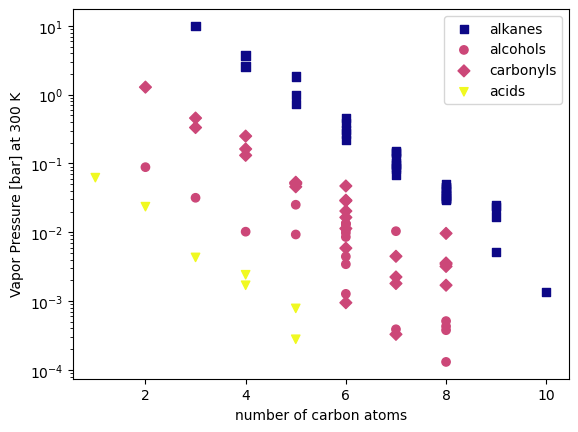

In [40]:
import matplotlib.colors
import matplotlib.cm

cnorm = matplotlib.colors.Normalize(vmin=0, vmax=2)

plt.scatter(vap_press.loc[vap_press['group'] == 'alkane', 'C'],
            vap_press.loc[vap_press['group'] == 'alkane', 'P [bar] at 300 K'],
            c=matplotlib.cm.plasma(cnorm(vap_press.loc[vap_press['group'] == 'alkane', 'O'])),
            marker='s', label='alkanes')

plt.scatter(vap_press.loc[vap_press['group'] == 'alcohol', 'C'],
            vap_press.loc[vap_press['group'] == 'alcohol', 'P [bar] at 300 K'],
            c=matplotlib.cm.plasma(cnorm(vap_press.loc[vap_press['group'] == 'alcohol', 'O'])),
            marker='o', label='alcohols')

plt.scatter(vap_press.loc[vap_press['group'] == 'carbonyl', 'C'],
            vap_press.loc[vap_press['group'] == 'carbonyl', 'P [bar] at 300 K'],
            c=matplotlib.cm.plasma(cnorm(vap_press.loc[vap_press['group'] == 'carbonyl', 'O'])),
            marker='D', label='carbonyls')

plt.scatter(vap_press.loc[vap_press['group'] == 'acid', 'C'],
            vap_press.loc[vap_press['group'] == 'acid', 'P [bar] at 300 K'],
            c=matplotlib.cm.plasma(cnorm(vap_press.loc[vap_press['group'] == 'acid', 'O'])),
            marker='v', label='acids')

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel('Vapor Pressure [bar] at 300 K')
ax.set_xlabel('number of carbon atoms')

plt.legend(loc='upper right')

By passing *labels* to each scatter plot definition we can also easily include them within a legend, which is easily called by [`plt.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

These are just the absolute **basics** of matplotlib, which show you how to quicly generate a visualization of some data.  

Interestingly, **pandas** also provides access to basic plotting functions of **matplotlib** by the [`pd.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method: 

<Axes: xlabel='number of carbon atoms', ylabel='Vapor Pressure [bar] at 300 K'>

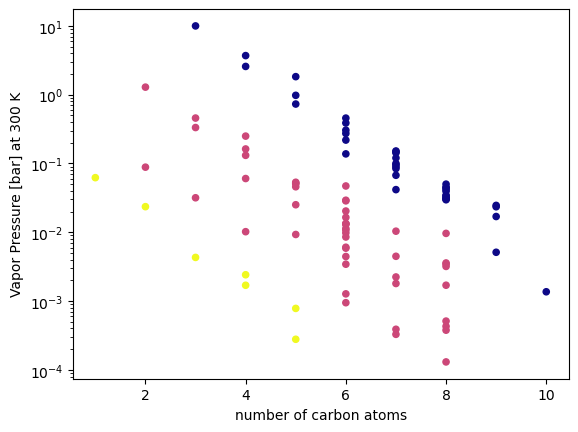

In [41]:
vap_press.plot(x='C', y='P [bar] at 300 K',
               c='O',
               kind='scatter',
               logy=True,
               xlabel='number of carbon atoms',
               ylabel='Vapor Pressure [bar] at 300 K',
               colormap=matplotlib.cm.plasma,
               colorbar=False)

We will go into more detail on how to use **matplotlib** within further sessions of the course as we will need it over and over again. Also in Assignment 2 you will need to dig a little bit deeper into matplotlib, discovering some new functions, which we didn't discuss here. 

## 2.4 Access chemistry databases

Now let's assume we are absolute chemistry beginners and we just loaded the above file with all thos molecule names. Imagine it could be any kind of data set of chemicals, which are not some semi-trivial easy to know alkanes. How can we find some information on these chemicals? 

There are several chemistry databases which incoporate many information on millions and millions of different chemicals. Mostly, they can be accessed via a web-browser based interface, but given a long list of chemicals we cannot just go there and try to search for each chemical indendependtly. That would just consume too much time. And this is the point where we enter data science and strongly linked to it, the usage of chemistry databases. 

Luckily there are python packages to access several chemistry databases:

- [**ChemSpiPy**](https://chemspipy.readthedocs.io/en/stable/*) to access **ChemSpider** the database of the British *Royal Society of Chemistry* (RSC).
- [**PubChemPy**](https://pubchempy.readthedocs.io/en/latest/) to access **PubChem** the database of the US-American *National Institutes of Health* (NIH)
- [**NistChemPy**](https://ivanchernyshov.github.io/NistChemPy/) to access the **NIST webbook** of the US-American *National Institute of Standardization* (NIST)

with the last one more in a beta-phase (will not be further discussed here). 

### 2.4.1 PubChemPy

In [42]:
# pip install pubchempy in a terminal first 
import pubchempy as pcp

In [43]:
print(pcp.get_synonyms('toluene', 'name'))

[{'CID': 1140, 'Synonym': ['toluene', 'methylbenzene', '108-88-3', 'toluol', 'Phenylmethane', 'methacide', 'methylbenzol', 'Benzene, methyl-', 'antisal 1a', 'Toluen', 'tolu-sol', 'Methane, phenyl-', 'Tolueen', 'Toluolo', 'phenyl methane', '1-Methylbenzene', 'monomethyl benzene', 'RCRA waste number U220', 'Tolueno', 'methyl-Benzene', 'Caswell No. 859', 'p-toluene', 'NCI-C07272', 'CP 25', 'CCRIS 2366', 'HSDB 131', 'NSC 406333', 'UN 1294', '4-methylbenzene', 'Benzene, methyl', 'EINECS 203-625-9', 'UNII-3FPU23BG52', 'EPA Pesticide Chemical Code 080601', 'NSC-406333', '3FPU23BG52', 'DTXSID7021360', 'CHEBI:17578', 'TOLUENE-3,5-D2', 'AI3-02261', 'MFCD00008512', 'CHEMBL9113', 'DTXCID501360', 'EC 203-625-9', 'Toluene, anhydrous', 'NCGC00090939-02', 'TOLUENE (IARC)', 'TOLUENE [IARC]', 'TOLUENE (MART.)', 'TOLUENE [MART.]', 'TOLUENE (USP-RS)', 'TOLUENE [USP-RS]', 'Tolueen [Dutch]', 'Toluen [Czech]', 'Toluene, analytical standard', 'Tolueno [Spanish]', 'Toluolo [Italian]', 'TOLUENE (RING-D5)', 'Tol

But now let's see how to get information of different molecules. 

The central call in `pubchempy` is `pcp.get_compounds()`. Using the CAS number is the most straightforward as it is a unique identifier and in our file `organic_vapor_pressures.csv` we have them anyways already and they are very often stored as a synonym with a certain compound on PubChem. 

In [44]:
found_compounds = pcp.get_compounds('cyclohexanol', 'name')
# line 90 in vap_press is cyclohexanol
print(type(found_compounds))
cyclohexanol = found_compounds[0]
cyclohexanol

<class 'list'>


Compound(7966)

Let's see what properties are stored with that compound:

In [45]:
cyclohexanol.to_dict()

{'atom_stereo_count': 0,
 'atoms': [{'aid': 1, 'number': 8, 'element': 'O', 'y': 1.345, 'x': 2.866},
  {'aid': 2, 'number': 6, 'element': 'C', 'y': 0.345, 'x': 2.866},
  {'aid': 3, 'number': 6, 'element': 'C', 'y': -0.155, 'x': 2},
  {'aid': 4, 'number': 6, 'element': 'C', 'y': -0.155, 'x': 3.732},
  {'aid': 5, 'number': 6, 'element': 'C', 'y': -1.155, 'x': 2},
  {'aid': 6, 'number': 6, 'element': 'C', 'y': -1.155, 'x': 3.732},
  {'aid': 7, 'number': 6, 'element': 'C', 'y': -1.655, 'x': 2.866},
  {'aid': 8, 'number': 1, 'element': 'H', 'y': 0.655, 'x': 3.403},
  {'aid': 9, 'number': 1, 'element': 'H', 'y': 0.4276, 'x': 1.788},
  {'aid': 10, 'number': 1, 'element': 'H', 'y': -0.2627, 'x': 1.3894},
  {'aid': 11, 'number': 1, 'element': 'H', 'y': -0.2627, 'x': 4.3426},
  {'aid': 12, 'number': 1, 'element': 'H', 'y': 0.4276, 'x': 3.9441},
  {'aid': 13, 'number': 1, 'element': 'H', 'y': -1.0473, 'x': 1.3894},
  {'aid': 14, 'number': 1, 'element': 'H', 'y': -1.7376, 'x': 1.788},
  {'aid': 15

We can access these entries either through directly calling the property from the already retrieved compound or alternatively using `pcp.get_properties()`:

In [46]:
xlogp_cyclohexanol = cyclohexanol.xlogp
print(xlogp_cyclohexanol)

xlogp_cyclohexanol = pcp.get_properties('xlogp', vap_press.loc[90, 'CAS'], 'name')
print(xlogp_cyclohexanol)

1.2
[{'CID': 7966, 'XLogP': 1.2}]


Using the 2d-coordinates of the atoms given in the record, we can even draw the molecule using `matplotlib`:

(-3.0, 3.0)

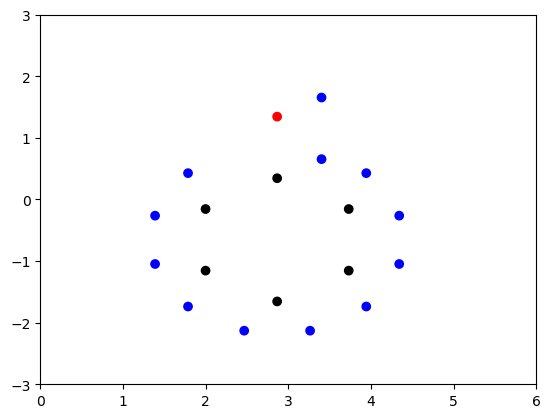

In [47]:
x_coordinates = []
y_coordinates = []
elements = []

for a in cyclohexanol.atoms:
    x_coordinates.append(a.x)
    y_coordinates.append(a.y)
    elements.append(a.element)

colors = []
for e in elements:
    if e == 'C':
        colors.append('black')
    elif e == 'O':
        colors.append('red')
    elif e == 'H':
        colors.append('blue')

plt.scatter(x_coordinates, y_coordinates, c=colors)
plt.gca().set_xlim(0, 6)
plt.gca().set_ylim(-3, 3)

We have seen that PubChem is structured into *compounds*  which have different *properties* and that we can access these compounds by their names and a variety of synonyms, and then retrieve different properties. Compounds and their properties are handled as *classes* within PubChemPy. This is classical object-orientated programming style (we will look at this again in the exercise session). 

Can we also trun this around and search for certain properties in the database and retrieve the compounds which fullfill these properties?
- PubChemPy does **not** enable a search for compounds fulfilling a certain *numerical* (XlogP, exact mass, etc.) property
- PubChemPy does allow searches for certain structures (e.g. functional groups) using e.g. *SMILES* strings 

We can for example search for all hydroperoxyacids (C(O)OOH) found in the database (for now limiting us to the first ten compounds). 

In [48]:
hydroperoxyacids = pcp.get_compounds('C(=O)OOH', 'smiles', searchtype='substructure', listkey_count=10)

pcp.get_synonyms(hydroperoxyacids[0].cid, 'cid')

[{'CID': 6585,
  'Synonym': ['PERACETIC ACID',
   'Peroxyacetic acid',
   'Ethaneperoxoic acid',
   '79-21-0',
   'Estosteril',
   'Acetic peroxide',
   'Peroxoacetic acid',
   'Acetyl hydroperoxide',
   'Monoperacetic acid',
   'Osbon AC',
   'Proxitane 4002',
   'Desoxon 1',
   'Ethaneperoxic acid',
   'Hydroperoxide, acetyl',
   'Acide peracetique',
   'Acido peroxiacetico',
   'Acecide',
   'Proxitane',
   'Caswell No. 644',
   'Peroxy acetic acid',
   'Acide peroxyacetique',
   'Kyselina peroxyoctova',
   'CCRIS 686',
   'HSDB 1106',
   'UNII-I6KPI2E1HD',
   'I6KPI2E1HD',
   'peroxy-acetic acid',
   'EINECS 201-186-8',
   'EPA Pesticide Chemical Code 063201',
   'BRN 1098464',
   'DTXSID1025853',
   'CHEMBL444965',
   'DTXCID805853',
   'CHEBI:42530',
   'EC 201-186-8',
   '4-02-00-00390 (Beilstein Handbook Reference)',
   'NCGC00166305-01',
   'PERACETIC ACID (MART.)',
   'PERACETIC ACID [MART.]',
   'Oxypel',
   'Perethanoic Acid',
   'Proxitane S',
   'Acide peracetique [French

PubChemPy also offers an integration with pandas, which allows you to extract all data directly into a `pd.DataFrame()`:

In [49]:
df_hydroperoxyacids = pcp.get_compounds('C(=O)OOH', 'smiles', searchtype='substructure', listkey_count=5, as_dataframe=True)

df_hydroperoxyacids

URLError: <urlopen error [Errno 101] Network is unreachable>

### 2.4.2 ChemSpiPy

As an alternative let's look at ChemSpiPy and see how it works:

In [ ]:
from chemspipy import ChemSpider

Here we introduce a new method of importing certain classes or functions from a module indvidually. 

The statement `from xy import z` allows to import specific subsets of a module and it gets assigned to the global namespace, i.e. it is from now on directly available:

In [ ]:
print(globals())

However, ChemSpider requires an account at the [RSC developer website](https://developer.rsc.org/) to access the database via `chemspipy`. 

If you create an account there (for free) you'll obtain an API-Key which needs to be used whenever you access the database, i.e. create an instance of the API when calling the main constructor of the python package:

In [ ]:
cs = ChemSpider("WonK1JfMzW9uLtIZCBohy3p0eyTsiwSW1ndAGEHp")

ChemSpPy works very similar like PubChemPy: The core objects are compounds, which contain the information/properties related to them.

But - as expected - the synatx is slightly different: The main query to the database is not via `get_compounds` or `get_properties` as in PubChemPy, but through the method [`search()`](https://chemspipy.readthedocs.io/en/stable/api.html#chemspipy.api.ChemSpider.search):

In [ ]:
compounds = cs.search('toluene')

for c in compounds:
    print(c)

So for the simple name toluene the database has many entries. The advantage of ChemSpiPy is that it is very easy to get an idea whether we have obtained the compund we were looking for, because if we just call that compound, it will display the potentially stored image of the structure of that compound.

In [ ]:
compounds[0]

Similar to PubChemPy, all other properties of a compound can be accessed by directly calling the respective property:

In [ ]:
compounds[0].monoisotopic_mass

In [ ]:
compounds[0].smiles

Again, ChemSpiPy is very limited in the way we can perform requests to the database, i.e. searching for compounds by their properties (and in the case of ChemSpiPy even a substructure search using smiles strings is not possible). However, if a compound is known to the user, its properties are quickly retrieved.

### 2.4.3 NistChemPy

Let's quickly explore also NistChemPy (nist). 

Here the basic function is called `nist.run_search()`

In [ ]:
import nistchempy as nist

s = nist.run_search(identifier = 'toluene', search_type = 'name')
s.compounds[0]

In [ ]:
s.compounds[0].__dict__

In [ ]:
s.compounds[0].mol_weight

However, many compound properties available in the NIST webbook, such as thermochemistry data, phase change data, etc. are not directly accessible, but just there respective URLs are given. 

### 2.4.4 Web scrapping

We have seen that the modules PubChemPy, ChemSpiPy and NistChemPy are nice to retrieve basic information of known compounds but cannot make full use of the databases. They do not provide decent tools to search across the database apart from molecular names and identifiers and they do not provide all properties stored in these databases. To solve these problems we need to dive into [web scrapping](https://en.wikipedia.org/wiki/Web_scraping) as long as we are dealing with public databases (not e.g., Elsevier reaxys).

Web scraping uses the librarys `requests` to run web requests with a known URL and `BeautifulSoup` to read out *html*. Feels like hacking but is okay for public databases (Elsevier restricts you from doing that on reaxys).  

Let's retrieve the URL of the Phase-Change data of a substance via NistChemPy:

In [ ]:
import nistchempy as nist


s = nist.run_search(identifier = 'toluene' , search_type = 'name')
cTP_url = s.compounds[0].data_refs['cTP']
cTP_url

We quickly walk through this example on how to scrap a boiling point from that URL.

A web request with `request` will basically "open" that URl for you in python. The response contains the HTML source code of that website:

In [ ]:
response = requests.get(cTP_url)

response.text

`BeautifulSoup` helps us to disentengle that html code and provides capabilities to scan the html for html objects like tables:

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")

tables[0]

Iterating over the table rows is done by looking for the html table row symbol `</tr>`:

In [ ]:
rows = tables[0].find_all("tr")
rows

Last identfying the columns of the table (html key `</td>`:

In [ ]:
for row in rows:
    columns = row.find_all("td")
    print(columns)

And then we are there: `T<sub>boil</sub>` is in the first column and the value is right next to it. Let's scarp it (careful with the empty columns):

In [ ]:
for row in rows:
    columns = row.find_all("td")

    if len(columns) >= 2:  # Ensure it's a valid row with at least two columns
        property_name = columns[0].text.strip()
        value = columns[1].text.strip()
                
        if "Tboil" in property_name:
            print(value)

Putting everything together into one function:

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_boiling_point(cTP_url):
    
    # Send HTTP GET request to fetch the page
    response = requests.get(cTP_url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Locate the table containing phase change data
    tables = soup.find_all("table")

    for table in tables:
        rows = table.find_all("tr")
        for row in rows:
            columns = row.find_all("td")

            if len(columns) >= 2:  # Ensure it's a valid row with at least two columns
                property_name = columns[0].text.strip()
                value = columns[1].text.strip()
                
                if "Tboil" in property_name:
                    return value
    return None


get_boiling_point(cTP_url)

We successfully hacked the web!

## 2.5 Cheminformatics using rdkit

Now we have seen that we can data from public databases quite easily with python. However, the data output of these databases are objects of classes representing compounds with a couple of properties and the python modules to access these databases do not provide in-depth chemistry, which would allow us to inspect the molecules further (PubChemPy and NistChemPy do not even provide any visual representation of the molecules). Furthermore, the properties need to be listed in the database and missing values (even if it is such an easy thing like number of heavy atoms, or the number of heteroatoms, etc.)

A package which handles this on the flight is [`rdkit`](https://www.rdkit.org/):

In [50]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

If we have for example a smiles string from some database available we can create the moelcule within rdkit: 

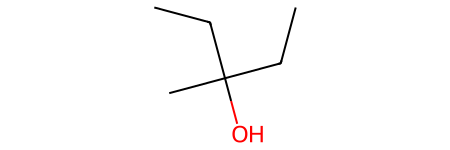

In [51]:
import pubchempy as pcp

found_compounds = pcp.get_compounds(vap_press.loc[50, 'CAS'], 'name')
smiles = found_compounds[0].isomeric_smiles

mol = Chem.MolFromSmiles(smiles)

mol

We see that `rdkit` is able to draw the molecules for us. 

That way we can also easily produce figures which show several 2D strcutures. Let's make one for the four molecules with the lowest vapor pressure in the dataset. 

First, we sort our `pd.DataFrame` using the [`pd.DataFrame.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method:

In [52]:
sorted_vap_press = vap_press.sort_values('P [bar] at 300 K', ignore_index=True)
sorted_vap_press

,Name,CAS,Sum Formula,P [bar] at 300 K,C,H,O,M [g mol-1],group
0,1-Octanol,111-87-5,C8H18O,0.000130,8,18,1,130.2310,alcohol
1,Pentanoic acid,109-52-4,C5H10O2,0.000278,5,10,2,102.1330,acid
2,Cycloheptanol,502-41-0,C7H14O,0.000328,7,14,1,114.1880,carbonyl
3,2-Octanol,123-96-6,C8H18O,0.000377,8,18,1,130.2310,alcohol
4,1-Heptanol,111-70-6,C7H16O,0.000389,7,16,1,116.2040,alcohol
...,...,...,...,...,...,...,...,...,...
90,Neopentane,463-82-1,C5H12,1.830000,5,12,0,72.1510,alkane
91,n-Butane,106-97-8,C4H10,2.576000,4,10,0,58.1240,alkane
92,Isobutane,75-28-5,C4H10,3.703000,4,10,0,58.1240,alkane
93,n-Propane,74-98-6,C3H8,9.999000,3,8,0,44.0970,alkane


let's get the smiles of the first four molecules using `pubchempy`:

In [53]:
smiles = []
mol_weight = []

for i in range(4):
    found_compounds = pcp.get_compounds(sorted_vap_press.loc[i, 'CAS'], 'name')
    smiles.append(found_compounds[0].isomeric_smiles)
    mol_weight.append(str(found_compounds[0].molecular_weight))

smiles

['CCCCCCCCO', 'CCCCC(=O)O', 'C1CCCC(CC1)O', 'CCCCCCC(C)O']

Creating the molecules using `rdkit`: 

In [54]:
substances = []

for s in smiles:
    mol = Chem.MolFromSmiles(s)
    substances.append(mol)

substances

And creating a neat figure using [`rdkit.Chem.Draw.MolsToGridImage`](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html):

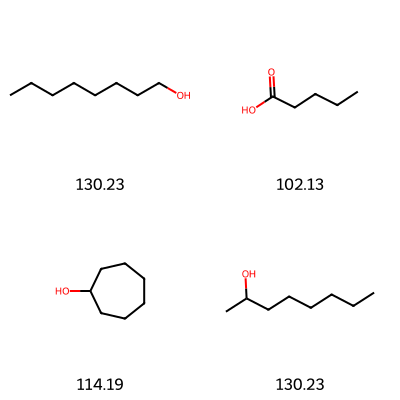

In [55]:
gi = Chem.Draw.MolsToGridImage(substances, molsPerRow=2, useSVG=True, legends=mol_weight)

gi

However, rdkit goes beyond this, as it has an intrinsic (i.e. somebody programmed it to have it) understanding of chemistry. It can for example give us the potential steroisomers of a molcule.

Let's look at some atmospheric Volatile Organic Compounds, which can be environmental pollutants as they interfere in the production of atmospheric ozone and the formation of secondary organic aerosols.

Let's inspect $\alpha$-pinene first, which is a VOC emitted from plants (especially pine trees as the name implies):

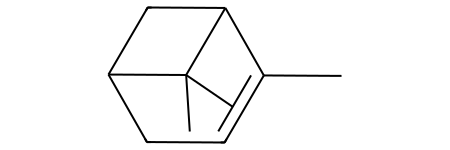

In [56]:
found_compounds = pcp.get_compounds('alpha-pinene', 'name')

apinene = Chem.MolFromSmiles(found_compounds[0].isomeric_smiles)

apinene

What stereoismoers do exist?

In [57]:
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers

apinene_isomers = list(EnumerateStereoisomers(apinene))

apinene_isomers

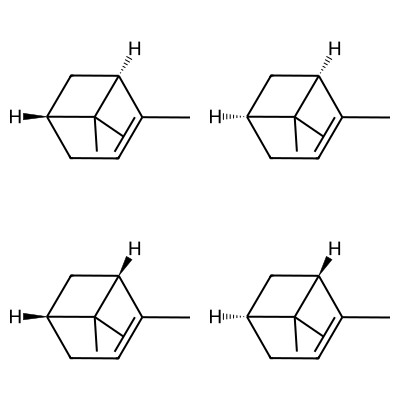

In [58]:
Chem.Draw.MolsToGridImage(apinene_isomers, molsPerRow=2, useSVG=True)

Or let's inspect pinonaldehyde, an oxidation product of $\alpha$-pinene:

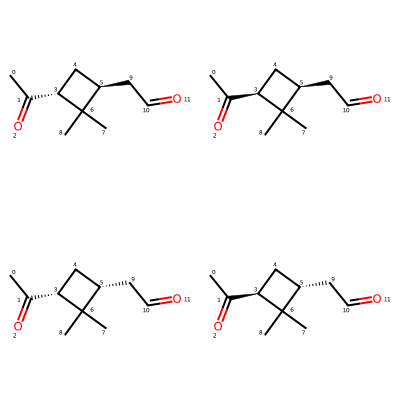

In [75]:
#found_compounds = pcp.get_compounds('2704-78-1', 'name')
#print(found_compounds[0].isomeric_smiles)
found_compounds = 'CC(=O)C1CC(C1(C)C)CC=O'
mol = Chem.MolFromSmiles(found_compounds)

isomers = list(EnumerateStereoisomers(mol))

Chem.Draw.MolsToGridImage(isomers, molsPerRow=2, useSVG=True)

For such more complex molecules, it might be useful to inspect properties using `rdkit`. 

For that we need to understand how `rdkit` molecules are built programatically: The object-orientated approach of `rdkit` is such that all molecules are objects of a certain `class` (which comes with different methods available to all molecules):

In [60]:
type(mol)

rdkit.Chem.rdchem.Mol

In [61]:
mol.GetNumHeavyAtoms()

12

All molecules are built from the atoms inside it, which are another `class` of `rdkit`, the `rdkit.Chem.rdchem.Atom` class, which again has a bunch of methods available to inspect the object. 

In [62]:
mol_atoms = mol.GetAtoms()

type(mol_atoms[0])

rdkit.Chem.rdchem.Atom

In [63]:
mol_atoms[0].GetSymbol()

'C'

In [64]:
mol_atoms[0].IsInRing()

False

Or to check if a molecule is aromatic (contains at least one aromatic ring):

In [65]:
mol_atoms[0].GetIsAromatic()

False

In [66]:
mol = Chem.MolFromSmiles('C1=CC=CC=C1')

ring_info = mol.GetRingInfo()  # Get ring information
for ring in ring_info.AtomRings():  # List of rings (each as a list of atom indices)
    if all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring):
        print('Aromatic')
    else:
        print('Not-Aromatic')

ring_info.AtomRings()

Aromatic


((0, 5, 4, 3, 2, 1),)

To know which atom is which in the molecule it is also possible to change the drawing option of `rdkit`:

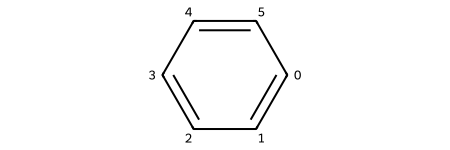

In [67]:
IPythonConsole.drawOptions.addAtomIndices = True

mol

In [68]:
mol_atoms[3].IsInRing()

True